In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
from ggplot import *
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import datasets
import statsmodels.api as sm
from sklearn.feature_selection import f_regression, mutual_info_regression
from statsmodels.formula.api import ols
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier as rf
from matplotlib import rc
import pylab

# Part 1: Regression analysis of Gapminder data

Below, we read the data in the csv file about the countries and their life expectancy, population, and gdp per capita  into a dataframe so we would be able to use it for analysis.

In [157]:
#read data from file into the dataframe
data = pd.read_csv("gap.csv", sep=',')
data = data.iloc[:, :-1]
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Scatter plot of life expectancy across time.

Below we have a scatter plot of all the intsances of the countries with their life expectancy over time. 

The general trend seems to imply that overall the life expectancy in almost all situations is going up over time. That being said, it is a generally gradual and slow trend and the slope of the curve appears to be going down around after the year 2000.

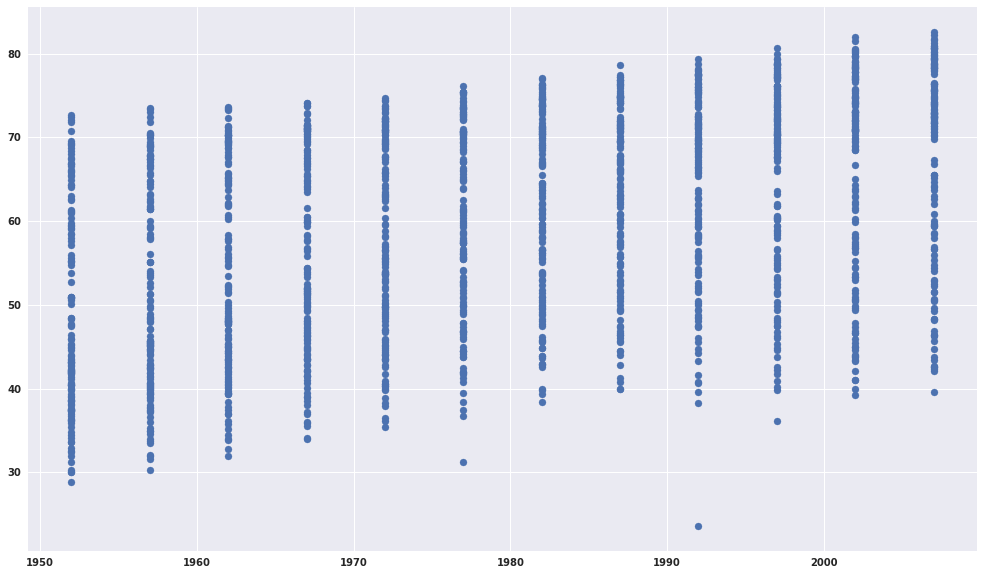

In [158]:
%matplotlib inline
pp.rcParams["figure.figsize"] = (17,10)
#plot year against life expectancy
pp.scatter(data['year'], data['lifeExp'])

Below are is a violion plot that displays the distribution of life expectancy across time in our data.

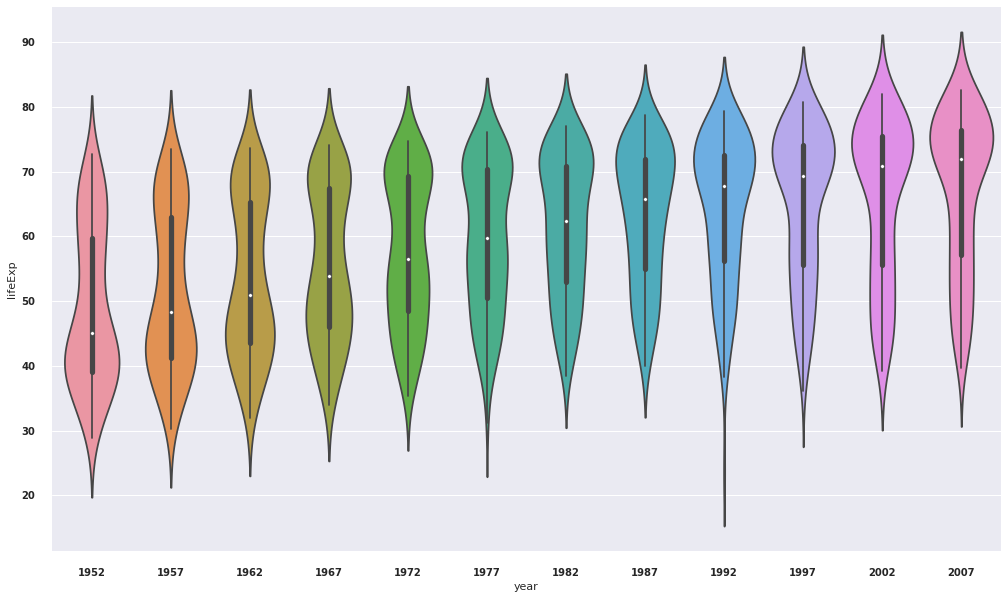

In [159]:
df1 = data.copy()
df1 = data.iloc[:, 2:4]

sns.violinplot(x="year", y="lifeExp", data=df1)
sns.despine(offset=10, trim=True);

Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?
    
Originally the mean seems to have been on the lower end for the earlier years but then it started going up slowly
and by 2007 is was on the higher end of the distribution. In addition to this, in the earlier years, the shape of the violin tend to indicate two bumps or areas of high probability and they were on different ends of the violin indicating that the distribution was a little bit bimodal. There were many countries with lower life expectancy and some at the really high end and not as many around the middle. However, in the layer years, the mean is higher and most of the countries have life expectancies around that higher mean, with a unimodal distribution skewed to the left.

Question 3: Suppose I fit a linear regression model of life expectancy vs. year, and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?
    
I believe we will reject the null hypothesis because the trend over time is not ambigous. Just generally from looking at the violin plot and the scatter plot life expectancy looks like it's increasing over time for most of the data points.

Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? 

If we are rejecting the null hypothesis of no relationship, the residuals should be randomly distibuted around y = 0 in the residuals plot. So, in the violin plot of the residuals should show a normal distribution. 

## Fit a linear regression model for life expectancy vs. year

Below we have a linear regression model for life expectancy versus year. And below it, a plot with the resulting model overlayed. 

In [160]:
reg = linear_model.LinearRegression()

years_train = np.array([[y] for y in data['year']])
exps_train = np.array([[e] for e in data['lifeExp']])


reg.fit(years_train, exps_train)
print(reg.coef_[0])
pred1 = reg.predict(years_train) 

#years_train = sm.add_constant(years_train)
mod1 = sm.OLS(years_train, exps_train).fit()
print(mod1.params)
mod1.summary()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 0.32590383]
[ 31.81099675]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        04:14:34   Log-Likelihood:                -12682.
No. Observations:                1704   AIC:                         2.537e+04
Df Residuals:                    1703   BIC:                         2.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.8110      0.164    193.471      0.000      31.489      32.133
==============================================================================
Omnibus:                      971.709   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.581
Skew:                           0.257   Prob(JB):                     2.17e-25
Kurtosis:                       1.844   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

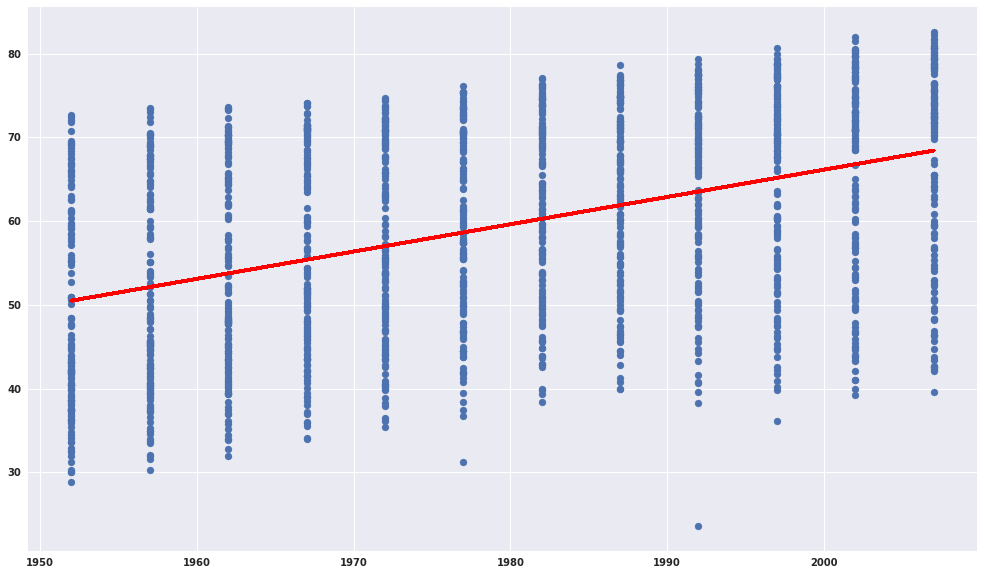

In [161]:
pp.scatter(data['year'], data['lifeExp'])
pp.plot(years_train, pred1, color='red', linewidth=3)

Question 5: According to the assumptions of the linear regression model, what should that violin plot look like?

Because the regression returned a R^2 value of .956, that indicates that yeara explains a good bit of the variability in life expectancy. However, the pot above shows that while the line porduced generally describes the trend, the nature of the data, it being in such a wide range for each year, indicates that some values will have really high residuals consistently and some will have really low ones. The violin plot should then show a kind of uniform probablity for a lot of the values and it should span a decently wide range.

Question 6: On average, by how much does life expectancy increase every year around the world?

Life expectancy increases by 0.3259 years for every year around the world.

Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

I do reject the null hypothesis of no relationship because we have an r-squared value of 0.956 which inplies that year explains about 96% of the variability in life expectancy and a p value less than 0.05 which means if there is no relationship, the chance of getting results like ours is low.

## Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

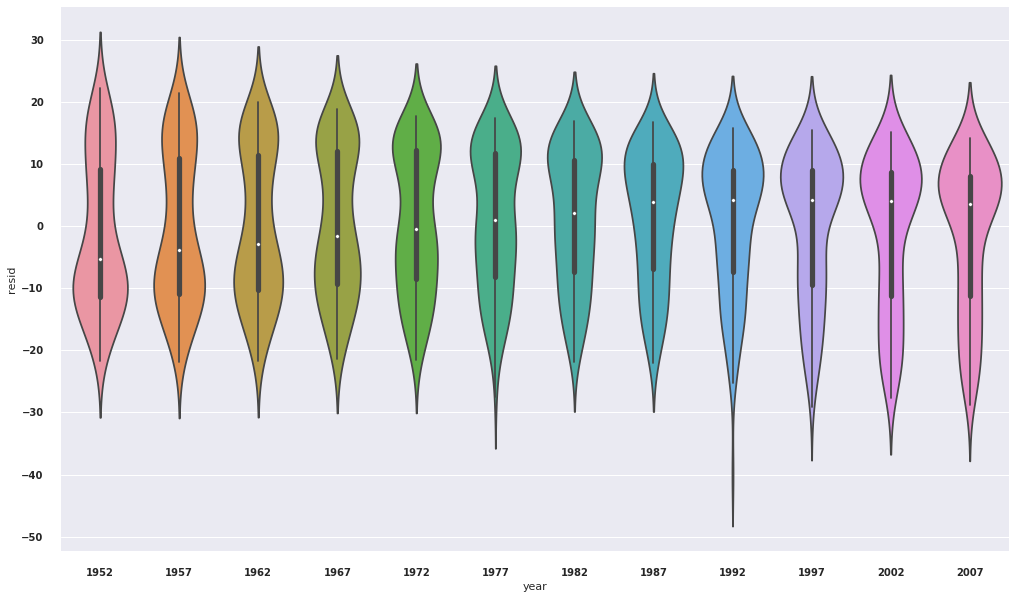

In [162]:
data3 = data.copy()


data3['predExp'] = reg.coef_[0][0] * (data3['year']) + reg.intercept_[0]
data3['resid'] = data3['lifeExp'] - data3['predExp']

sns.violinplot(x="year", y="resid", data=data3)
sns.despine(offset=10, trim=True);


Question 8: Does the plot of Exercise 3 match your expectations in question 4?

Yeah, to a certain extent. The unimodal distribution is very true for the later years but not so much for the earlier years. In addition to that, the range in which the residuals are happening seems to be going down, like to more negative numbers which makes sense because the model is increasing faster than a lot of the points in the plot. However, overall the range is generally the same and around 0 which is something I forsaw.

Below is a residuals plot to get a better view of the trend.

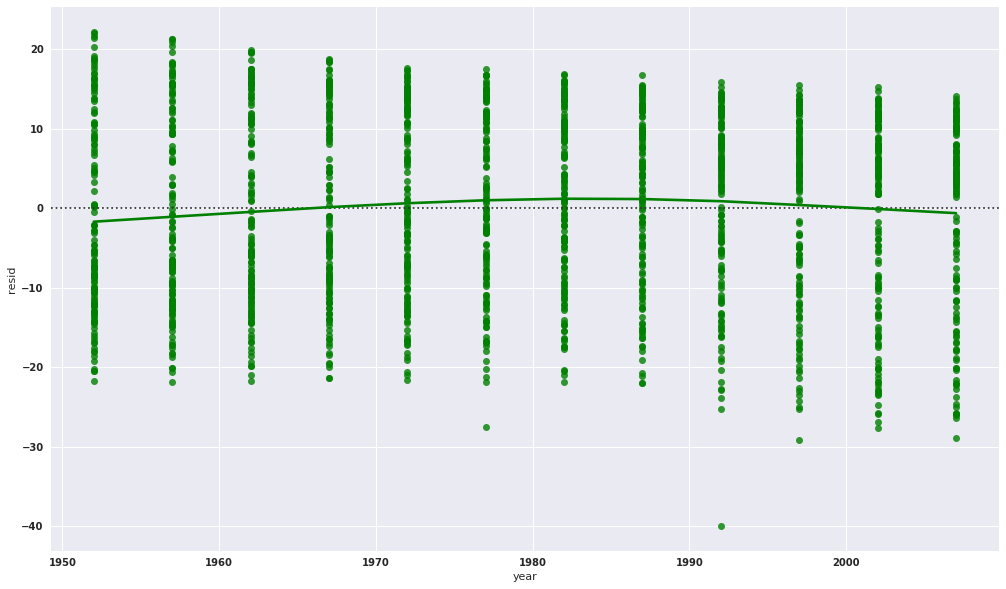

In [163]:
sns.residplot(data3['year'], data3['resid'], lowess=True, color="g")

## Boxplot (or violin plot) of model residuals vs. continent.

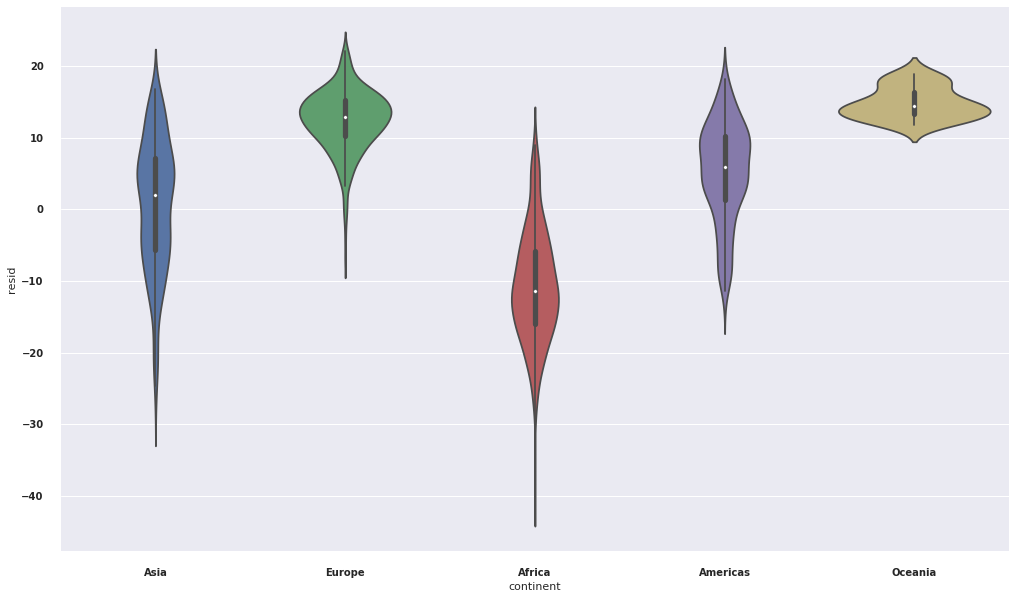

In [164]:
sns.violinplot(x="continent", y="resid", data=data3)
sns.despine(offset=10, trim=True);

Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes. It appears that some continents, have a much smaller range in which there residuals occurred than others. Europe and Oceania. This indicates that the residual error was consistent so the model was not fluctuating much so the life expectancies themselves were changing at a rate similar to that of the model. That being said, they are on the higher end of the spectrum so it was consistenly under predicting them. Asia and Africa have more values in the negatives meaning that the model was overpredicting their life expectancies more often. 

This plot suggests that when performing regression analysis of life expectancy over time we should take into account the effect that continent may have of those results because different contintents seem to have different batches of data.

## Scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

Africa


Americas


Asia


Europe


Oceania


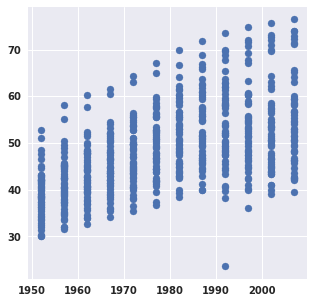

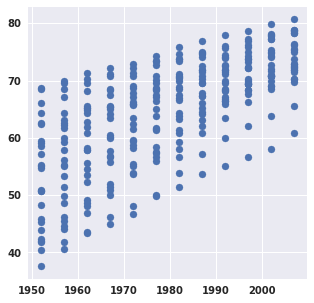

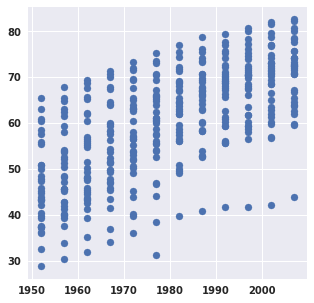

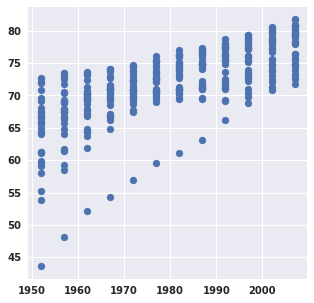

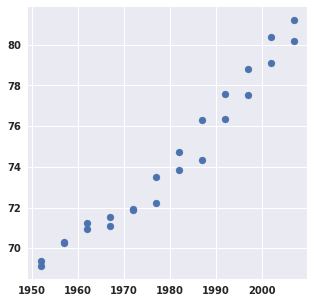

In [165]:
pp.rcParams["figure.figsize"] = (5,5)
data4 = data.copy()
data4a = data4.groupby(['continent']).lifeExp
data4b = data4.groupby(['year']).lifeExp
Ys = []
Exs = []
keys = []
i = 0

for k, v in data4b:
    keys.append(k)
    
for ys, es in data4a:
    i = i + 1
    print (ys)
    Ys.append(ys)
    
    dd = data4.loc[data4['continent'] == ys]
    #print (dd)
    
    #print (es)
    Exs.append(es.mean())
    fig = pp.figure(i)
    pp.scatter(dd['year'], dd['lifeExp'])


Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes. The scatter plots show slightly differen interactions. The trend is still the same, life expectancy increases with time but Oceania's life expectancy is never lower than 60 and goes all the way up to 85+ while Asia had values below 30 at one point and those data points went up to above 60. Not only are the ranges different, but the rate of chnage is pretty different as well.

In [177]:
data5 = data.copy()

data5 = data.copy()
data5['Africa'] = data5['continent'].map(lambda x: 1 if x == 'Africa' else 0)
data5['Asia'] = data5['continent'].map(lambda x: 1 if x == 'Asia' else 0)
data5['Europe'] = data5['continent'].map(lambda x: 1 if x == 'Europe' else 0)
data5['Americas'] = data5['continent'].map(lambda x: 1 if x == 'Americas' else 0)
data5['Oceania'] = data5['continent'].map(lambda x: 1 if x == 'Oceania' else 0)

data5.head()


,country,continent,year,lifeExp,pop,gdpPercap,Africa,Asia,Europe,Americas,Oceania
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,1,0,0,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,1,0,0,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,1,0,0,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,1,0,0,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,1,0,0,0


## Fit a linear regression model for life expectancy including a term for an interaction between continent and year.

In [178]:
X = np.array([[a] for a in data5[['continent', 'year']]])
y = np.array([[e] for e in data5['lifeExp']])

mod2 = ols(formula='lifeExp ~ year * continent', data=data).fit()
#res = mod2.fit()
#pred2 = mod2.predict(X,transform=False)
mod2.summary()


#model2 = sm.OLS(y, X).fit()

#model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        04:25:07   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

Not all the parameters are significantly different from zero. Year with Oceania, Europe, and the Americas were relatively low.

Question 12: On average, by how much does life expectancy increase each year for each continent? 

The year coeffiecient by itself is 0.2895. Increase in life expectancy for the Americas is (.2895 + .0718) = 0.3613 years per year. Increase in life expectancy for Asia is (.2895 + .1636) = 0.4621 years per year. Increase in life expectancy for Europe is (.2895 - .0676) = 0.2219 years per year. Increase in life expectancy for Oceania is (.2895 - .0793) = 0.2102 years per year.

## Perform an F-test that compares how well two models fit your data

In [182]:
import scipy.stats as stats
#data5.head()
X = data6[['year','Africa','Asia', 'Europe', 'Americas', 'Oceania']]
t_pred = X.dot(mod2.params.values[4:10])
pred2 = np.array([[a] for a in t_pred]) #with year and continent interaction
stats.f_oneway(pred1,pred2)

F_onewayResult(statistic=array([ 4221.2995497]), pvalue=array([ 0.]))

## Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

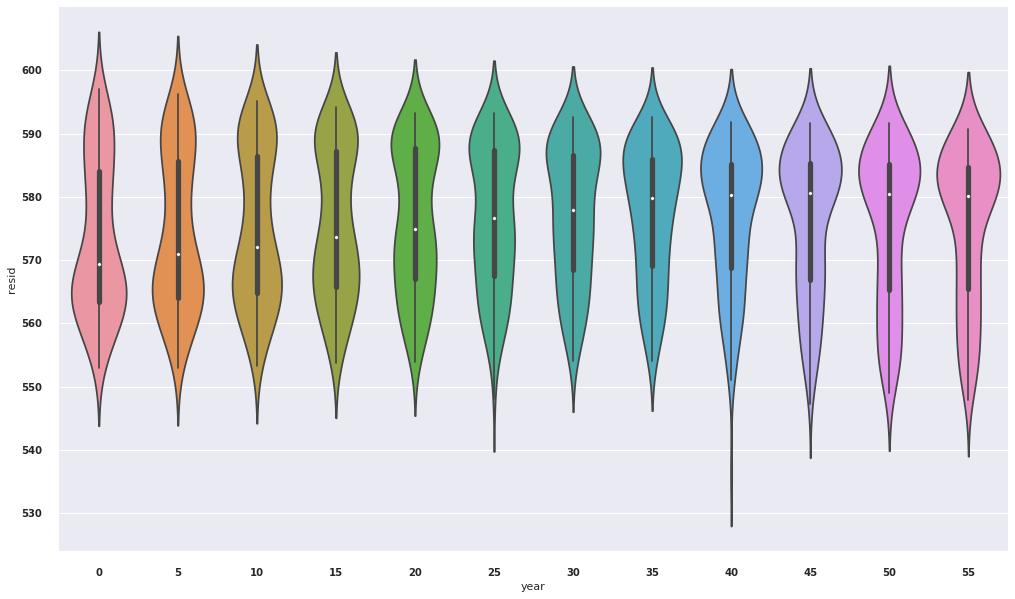

In [187]:
pp.rcParams["figure.figsize"] = (17,10)

data6a = data6.copy()
ws = mod2.params.values

data6a['predExp'] = ws[0] + ws[5]*data6a['year'] + ws[6]*data6a['Americas'] + ws[7]*data6a['Asia'] + ws[8]*data6a['Europe'] + ws[9]*data6a['Oceania']

#data6a['predExp'] = ws[0] * (data6a['year']) + ws[0]
data6a['resid'] = data6a['lifeExp'] - data6a['predExp']

sns.violinplot(x="year", y="resid", data=data6a)
sns.despine(offset=10, trim=True);

The shapes for the two residual plots here are really similar in shape but the error is muc hbigger

# Part 2: Classification

In [196]:
data5 = data.copy()

data5 = data.copy()
data5['Africa'] = data5['continent'].map(lambda x: 1 if x == 'Africa' else 0)
data5['Asia'] = data5['continent'].map(lambda x: 1 if x == 'Asia' else 0)
data5['Europe'] = data5['continent'].map(lambda x: 1 if x == 'Europe' else 0)
data5['Americas'] = data5['continent'].map(lambda x: 1 if x == 'Americas' else 0)
data5['Oceania'] = data5['continent'].map(lambda x: 1 if x == 'Oceania' else 0)

data5.head()


,country,continent,year,lifeExp,pop,gdpPercap,Africa,Asia,Europe,Americas,Oceania
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,1,0,0,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,1,0,0,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,1,0,0,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,1,0,0,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,1,0,0,0


## Implement the gradient descent algorithm for linear regression

Below I have implemented the gradient descent algorithm for linear regression, the batch version.

In [27]:
#linear regression

data6 = data5.copy()
data6['year'] = data6['year'].map(lambda x: x - 1952)
X = data6[['year','Africa','Asia', 'Europe', 'Americas', 'Oceania']]
Y = data6['lifeExp']
W = mod2.params.values

def compute_loss(Y, Yhat):
    m = np.zeros(len(Y))
    for i in range(len(Y)):
        m[i:i+1] = 0.5*(Yhat[i:i+1] - Y[i:i+1])**2
    return m

def compute_gradient(X, y, theta, Yhat):
    Ycal = np.zeros(len(X))
    
    for i in range(len(y)):
        t_theta = Y - Yhat

        
        Ycal[i] = X[i:(i+1)].year*t_theta[0] + X[i:(i+1)].Africa*t_theta[1] + X[i:(i+1)].Asia*t_theta[2]\
                    + X[i:(i+1)].Europe*t_theta[3] + X[i:(i+1)].Americas*t_theta[4] + X[i:(i+1)].Oceania*t_theta[5]

    W_n = X.T.dot(y - Ycal)
    return W_n


def train_grad_descent1 (X, Y, alpha, K):
    
    D, Q = X.shape
    #initialize weights and loss
    theta = np.zeros(Q)
    loss = np.zeros(D)
    
    Yhat = np.zeros(len(X))
    
    
    for k in range(K):
        i = 0
        
        for i in range(len(X)):
            Yhat[i] = X[i:(i+1)].year*theta[0] + X[i:(i+1)].Africa*theta[1] + X[i:(i+1)].Asia*theta[2]\
                        + X[i:(i+1)].Europe*theta[3] + X[i:(i+1)].Americas*theta[4] + X[i:(i+1)].Oceania*theta[5]
        
        #compute loss for kth iteration
        loss = compute_loss(Y, Yhat)
        
        #compute gradient by taking partial derivative of our loss function with respect to our weights theta
        gradient = compute_gradient(X, Y, theta, Yhat)
        
        #update theta
        theta = theta - alpha * gradient
        
    return theta,loss

train_grad_descent1 (X, Y, .5, 1)

(year        2.515583e+07
 Africa      2.413302e+05
 Asia        1.512640e+05
 Europe      1.357459e+05
 Americas    1.145185e+05
 Oceania     9.073672e+03
 dtype: float64,
 array([  414.7488005,   460.015112 ,   511.9040045, ...,  1095.5412405,
          799.5600605,   945.5595845]))

## Derive the above update equation.

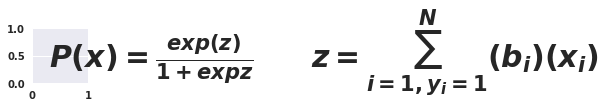

In [104]:
pp.text(.3,.3,r'$P(x) = \frac{exp(z)}{1+exp z}$')
#pp.show()
pp.text(5,.3,r'$z = \sum_{i=1,y_i=1}^N (b_i)(x_i)$')
pp.show()

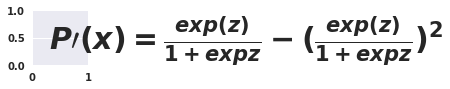

In [118]:
pp.text(.3,.3,r'$P\prime (x) = \frac{exp(z)}{1+exp z} - (\frac{exp(z)}{1+exp z})^2$')
#pp.text(.3,.3,r'$P\prime (x) = \frac{exp(z)}{1+exp z} - (\frac{exp(z)}{1+exp z})^2$')

pp.show()

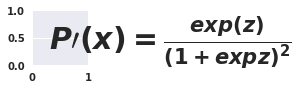

In [120]:
pp.text(.3,.3,r'$P\prime (x) = \frac{exp(z)}{(1+exp z)^2} $')
pp.show()

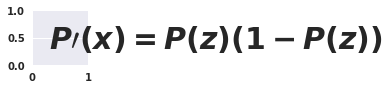

In [124]:
pp.text(.3,.3,r'$P\prime (x) = P(z)(1-P(z))$')

Log likelihood expression is as follows.

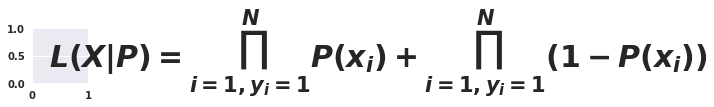

In [125]:
pp.text(.3,.3,r'$L(X|P) = \prod_{i=1,y_i=1}^N P(x_i) + \prod_{i=1,y_i=1}^N (1 - P(x_i))$')

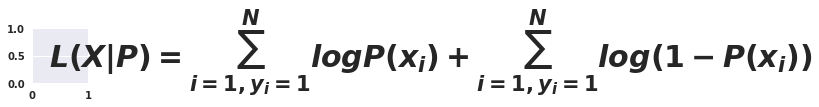

In [126]:
import matplotlib.pyplot as pp
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

pp.rc('font', **font)
pp.rcParams["figure.figsize"] = (1,1)

#pp.text(.3,.3,r'$L(X|P) \alpha > \beta$')

pp.text(.3,.3,r'$L(X|P) = \sum_{i=1,y_i=1}^N log P(x_i) + \sum_{i=1,y_i=1}^N log(1 - P(x_i))$')
pp.show()


Maximizing the log likelihood will maximize likelihood and to do this we take its gradient.

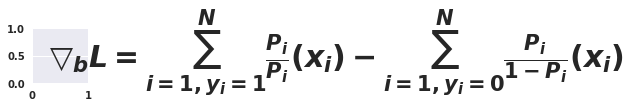

In [127]:
pp.text(.3,.3,r'$\bigtriangledown _bL = \sum_{i=1,y_i=1}^N \frac{P_i}{P_i} (x_i) - \sum_{i=1,y_i=0}^N\frac{P_i}{1-P_i} (x_i) $')
pp.show()

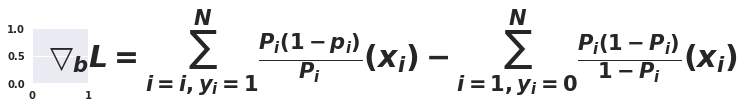

In [92]:
pp.text(.3,.3,r'$\bigtriangledown _bL = \sum_{i=i,y_i=1}^N \frac{P_i(1-p_i)}{P_i} (x_i) - \sum_{i=1,y_i=0}^N\frac{P_i(1-P_i)}{1-P_i} (x_i) $')
pp.show()

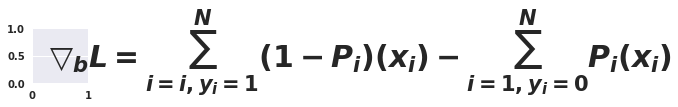

In [94]:
pp.text(.3,.3,r'$\bigtriangledown _bL = \sum_{i=i,y_i=1}^N (1-P_i)(x_i) - \sum_{i=1,y_i=0}^N P_i (x_i) $')
pp.show()

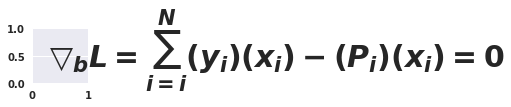

In [97]:
pp.text(.3,.3,r'$\bigtriangledown _bL = \sum_{i=i}^N (y_i)(x_i) - (P_i)(x_i) = 0$')
pp.show()

## Implement the gradient descent algorithm for logistic regression

Below I have implemented the gradient descent algorithm for logistic regression, the batch version.

In [31]:
data7 = data5.copy()
data7['year'] = data7['year'].map(lambda x: x - 1952)
X = data7[['year','Africa','Asia', 'Europe', 'Americas', 'Oceania']]
Y = data7['lifeExp']
W = mod2.params.values

def compute_loss2(Y, Yhat):

    m = np.zeros(len(Y))
    for i in range(len(Y)):
        m[i:i+1] = 0.5*(Yhat[i:i+1] - Y[i:i+1])**2
    return m

def p_val2(B, i, X):
    r = np.zeros(len(B))

    for j in range(len(B)):
        r[j] = ((math.e)**(X[i:i+1].dot(B)))/(1 + (math.e)**(X[i:i+1].dot(B)))
    
    return r

def compute_gradient2(X, y, theta):
    Ycal = np.zeros(len(X))
    
    for i in range(len(y)):
        t_theta = p_val2(theta,i,X)
        Ycal = X.dot(t_theta)

    W_n = X.T.dot(y - Ycal)
    return W_n


def train_grad_descent2(X, Y, alpha, K):
    
    D, Q = X.shape
    theta = np.zeros(Q)
    loss = np.zeros(D)
    
    Yhat = np.zeros(len(X))
    
    
    for k in range(K):
        i = 0
        
        Yhat = X.dot(theta)
        
        #compute loss for kth iteration
        loss = compute_loss2(Y, Yhat)
        
        #compute gradient by taking partial derivative of our loss function with respect to our weights theta
        gradient = compute_gradient2(X, Y, theta)
        
        #update theta
        theta = theta - alpha * gradient
        
    return theta,loss

train_grad_descent2 (X, Y, .5, 1)

(year       -1.015419e+06
 Africa     -1.079998e+04
 Asia       -9.071351e+03
 Europe     -1.037766e+04
 Americas   -7.561310e+03
 Oceania    -7.209145e+02
 dtype: float64,
 array([  414.7488005,   460.015112 ,   511.9040045, ...,  1095.5412405,
          799.5600605,   945.5595845]))

## Simulations

Here I simulated data from my linear and logistic models to check if my implementation recovered the parameters correctly.

In [32]:
#simulate data for linear regression

gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

log_gen_data_x


array([[-0.50737815, -0.19912238, -0.10277674, ...,  1.16538552,
         1.95911285, -0.07489966],
       [-2.24640253, -0.45450839, -2.20190546, ...,  1.3121554 ,
         1.25507227,  0.38024573],
       [-0.92830443, -0.16151208, -0.27688992, ...,  0.03318409,
        -1.13131847, -0.5391018 ],
       ..., 
       [ 2.12096054,  1.54454734,  1.14934333, ...,  1.51579619,
         0.28113463, -0.31505387],
       [ 0.26224198,  0.70262635,  1.99504443, ..., -1.98152815,
        -0.10140951, -0.52361586],
       [ 0.31365799, -0.96371609, -0.5731594 , ...,  0.2147754 ,
         0.64795292,  0.20473982]])

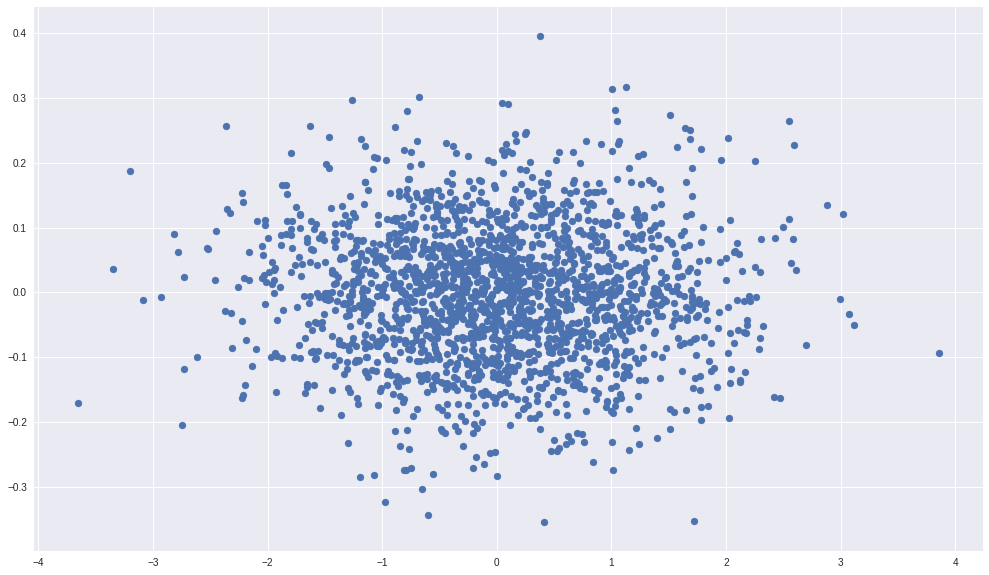

In [33]:
%matplotlib inline
pp.rcParams["figure.figsize"] = (17,10)

#a really bad estimator
#returns random vector as estimated parameters
dummy = np.ndarray([100, 20])
for index, row in enumerate(dummy):
    dummy[index] = np.random.normal(0, .1, 20)
pp.scatter(gen_data_x, dummy)

# Try it out 

Here I used a different part of my dataset and ran Linear Discriminant Analysis and random forests algorithms on it to compare the prediction performance of them to the logistic gradient descent algorithm implemented above.

In [51]:
from sklearn.model_selection import cross_val_score as cvs
from scipy.stats import ttest_rel as tt
from scipy.stats import sem as se

# set x and y
y = data['country']
X = data[['gdpPercap', 'pop']]

lab_enc = preprocessing.LabelEncoder()
e1 = lab_enc.fit_transform(data['country'])

# models using Random Forests, Linear Discriminant Analysis
model_rfc = rf()
model_lda = lda()

''' make our own algorithm into a model class '''

class LogGradDesc:
    
    # initialize method
    def __init__(self, e = 0):
        self.e = 0
        
    # we already fitted, so just return predictions
    def fit(self, X, y, **kwargs):
        return e1
    
    # define score
    def score(self, Xp, ya):
        
        # the parameter X will always be e1, our prediction
        # parameter y will always be Y, our actual
        # return ratio between mean actual and mean predicted 
        return math.fabs(ya.mean() / Xp.mean())
    
    # return parameters (meaningless)
    def get_params(self, deep = False):
        return {'e': self.e}
    
''' end class definition '''

# make a model - an instance of our model class
model_lgd = LogGradDesc()
#model_lgd = train_grad_descent2(data[['gdpPercap', 'pop']], encd,.5,1)

# scores from performing the cross-validation procedure (10-Fold)
score_rfc = cvs(model_rfc, X, y, cv = 10)
score_lda = cvs(model_lda, X, y, cv = 10)
score_lgd = cvs(model_lgd, e1, Y, cv = 10)

# standard errors for these scores
error_rfc = se(score_rfc)
error_lda = se(score_lda)
error_lgd = se(score_lgd)

# output mean, max., and min. scores for LDA
print('\033[1m' + '\nLinear Discriminant Analysis Results' + '\033[0m')
print('Mean Score:\t\t\t\t{0}\nError Estimate (via Standard Error):\t{1}'
      .format(score_lda.mean(), error_lda),
      end = '\n'
     )

# output mean, max., and min. scores for RF
print('\033[1m' + '\nRandom Forests Classification Results' + '\033[0m')
print('Mean Score:\t\t\t\t{0}\nError Estimate (via Standard Error):\t{1}'
      .format(score_rfc.mean(), error_rfc),
      end = '\n'
     )

# output mean, max., and min. scores for Logistic Regression
print('\033[1m' + '\nLogistic Regression Algorithm Results' + '\033[0m')
print('Mean Score:\t\t\t\t{0}\nError Estimate (via Standard Error):\t{1}'
      .format(score_lgd.mean(), error_lgd),
      end = '\n'
     )


' make our own algorithm into a model class '

' end class definition '


Linear Discriminant Analysis Results
Mean Score:				0.1778169014084507
Error Estimate (via Standard Error):	0.047720325815225784

Random Forests Classification Results
Mean Score:				0.22112676056338026
Error Estimate (via Standard Error):	0.025346678256008035

Logistic Regression Algorithm Results
Mean Score:				1.8377216488999366
Error Estimate (via Standard Error):	0.8183927547588946
